Abstract:

El dataet que analizaré fue obtenido desde la siguiente URL: https://catalogodatos.gub.uy/dataset/ministerio-de-turismo-turismo-emisivo
Son datos abiertos del gobierno uruguayo, donde publican diversos organismos, ministerios, intendencias, etc. y en esta ocasión me focalicé em los datos del turismo de salida de los uruguayos (tursimo emisivo, dicho desde el punto de vista de la ecuación de balanza comercial: importación de servicios; gasto de los residentes uruguayos en el exterior). Esta base es publicada y mantenida por el Ministerio de Tursimo uruguayo. Cito textual desde la web la descripción del dataset: "Conjunto referente a los datos de Turismo Emisivo, obtenidos a través de la encuesta de Turismo Receptivo, este conjunto contiene la información desagregada de los residentes de Uruguay que viajan fuera del país y el gasto de los mismos según destino principal del viaje. Datos obtenidos en cada trimestre desde el año 2016".

Metadatos:

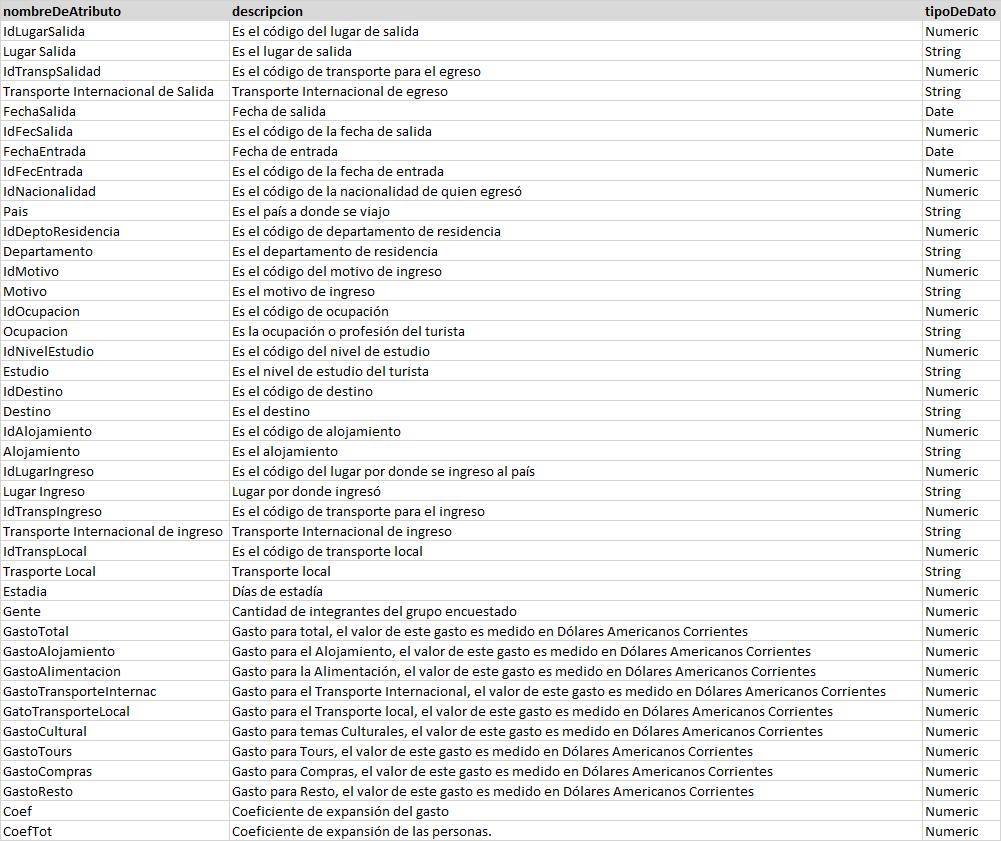

Hipótesis:
"Los uruguayos cada vez viajan más y gastan más en el turismo de salida". Es "Box populi" escuchar entre las familias uruguayas dicha frase. Así las "noticias" y las agencias de viajes lo ratifican. Se agotan todos los paquetes turísitcos meses antes de las vacaciones.
El residente uruguayo se queja de su situación económica pero sin embargo viaja con mayor frecuencia. Si bien hay mayor facilidad financiera, y la globalización ha mejorado las tarifas, las comunicaciones y el acceso en general, en algún momento hay que amortizar dicho gasto que parece se ha instaurado como parte de la canasta básica de los uruguayos.
Por lo tanto, busco probar la hipótesis de que realmente el residente uruguayo ha incrementado su gasto en turismo y se queja o bien "por deporte" (propio de la idiosincrasia uruguaya), o porque resigna otros consumos.
también me gustaría ahondar en la misma, realizando cruces transversales como por nivel de estudio, ocupación, ubicación geográfica dentro del país, entre otros.     

Objetivos del análisis:

* Tratar de estimar/modelizar el gasto promedio del turismo de salida del residente uruguayo en base a las caracterísitcas del viaje.

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 42)
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/GuzmanManta/Data_Science/raw/main/Emisivo_flujo%20de%20residentes%20de%20UY_import%20de%20servicios%20(gtos%20en%20el%20Exterior)_2016%20a%202024.xlsx'
df = pd.read_excel(url)


In [5]:
df.head()

,IdLugarSalida,Lugar Salida,IdTranspSalidad,Transporte Internacional de Salida,FechaSalida,IdFecSalida,FechaEntrada,IdFecEntrada,IdNacionalidad,Pais,IdDeptoResidencia,Departamento,IdMotivo,Motivo,IdOcupacion,Ocupacion,IdNivelEstudio,Estudio,IdDestino,Destino,IdAlojamiento,Alojamiento,IdLugarIngreso,Lugar Ingreso,IdTranspIngreso,Transporte Internacional de Ingreso,IdTranspLocal,Trasporte Local,Estadia,Gente,GastoTotal,GastoAlojamiento,GastoAlimentacion,GastoTransporteInternac,GatoTransporteLocal,GastoCultural,GastoTours,GastoCompras,GastoResto,Coef,CoefTot
0,4,Chuy,2,Terrestre Auto,2016-12-29,13512,2017-01-10,13524,1,Uruguay,21,Montevideo,1,"Ocio, Recreo, Vacaciones",15,"Obrero esp, Conductor, Artesano",4.0,Secundaria completa,20,Brasil,5,Vivienda Arrendada,4,Chuy,2,Terrestre Auto,0,Sin Datos,12.0,5,1507.12,981.39,350.50,0.0,175.24,0.00,0.00,0.00,0.00,89.61,448.05
1,18,Río Branco,2,Terrestre Auto,2016-12-29,13512,2017-01-09,13523,1,Uruguay,31,Maldonado,1,"Ocio, Recreo, Vacaciones",3,Estudiante,5.0,Terciaria incompleta,20,Brasil,1,Hotel,18,Río Branco,2,Terrestre Auto,0,Sin Datos,11.0,5,3275.00,1100.00,880.00,0.0,385.00,300.00,235.00,210.00,165.00,96.18,480.88
2,3,Aeropuerto de Carrasco,1,Aereo,2017-01-03,13517,2017-01-27,13541,1,Uruguay,20,Canelones,1,"Ocio, Recreo, Vacaciones",11,"Patron, Com, Ind, Prod Agrop",4.0,Secundaria completa,40,Europa,6,Vivienda Familiares / Amigos,3,Aeropuerto de Carrasco,1,Aereo,0,Sin Datos,24.0,2,4785.75,0.00,1129.75,214.0,836.85,523.03,256.29,2039.83,0.00,129.04,258.09
3,3,Aeropuerto de Carrasco,1,Aereo,2017-01-06,13520,2017-01-21,13535,1,Uruguay,21,Montevideo,1,"Ocio, Recreo, Vacaciones",16,"Empl. Adm, Cajero, Vendedor",5.0,Terciaria incompleta,20,Brasil,2,Appart Hotel,3,Aeropuerto de Carrasco,1,Aereo,0,Sin Datos,15.0,3,5883.00,2228.41,1782.73,117.0,779.94,445.68,0.00,311.98,334.26,129.04,387.13
4,4,Chuy,2,Terrestre Auto,2017-01-02,13516,2017-01-25,13539,1,Uruguay,20,Canelones,1,"Ocio, Recreo, Vacaciones",11,"Patron, Com, Ind, Prod Agrop",6.0,Terciaria completa,20,Brasil,5,Vivienda Arrendada,4,Chuy,2,Terrestre Auto,0,Sin Datos,23.0,5,3400.00,1800.00,933.12,0.0,408.24,152.14,0.00,106.50,0.00,89.61,448.05


In [ ]:
df.shape

(25567, 41)

In [4]:
df.dtypes

IdLugarSalida                                   int64
Lugar Salida                                   object
IdTranspSalidad                                 int64
Transporte Internacional de Salida             object
FechaSalida                            datetime64[ns]
IdFecSalida                                     int64
FechaEntrada                           datetime64[ns]
IdFecEntrada                                    int64
IdNacionalidad                                  int64
Pais                                           object
IdDeptoResidencia                               int64
Departamento                                   object
IdMotivo                                        int64
Motivo                                         object
IdOcupacion                                     int64
Ocupacion                                      object
IdNivelEstudio                                float64
Estudio                                        object
IdDestino                   

In [6]:
df.describe()

,IdLugarSalida,IdTranspSalidad,FechaSalida,IdFecSalida,FechaEntrada,IdFecEntrada,IdNacionalidad,IdDeptoResidencia,IdMotivo,IdOcupacion,IdNivelEstudio,IdDestino,IdAlojamiento,IdLugarIngreso,IdTranspIngreso,IdTranspLocal,Estadia,Gente,GastoTotal,GastoAlojamiento,GastoAlimentacion,GastoTransporteInternac,GatoTransporteLocal,GastoCultural,GastoTours,GastoCompras,GastoResto,Coef,CoefTot
count,25567.000000,25567.000000,25567,25567.000000,25567,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,24406.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000,25567.000000
mean,5.967380,2.583330,2020-03-03 13:10:12.367505152,14672.548754,2020-03-10 00:34:31.545351168,14679.023976,1.414128,28.148199,2.093128,12.765635,4.666516,15.733915,3.763602,6.006532,2.582743,1.924043,6.488286,2.256229,1204.015531,325.380332,271.990188,344.680278,134.130564,85.560638,5.529377,261.252768,120.171704,241.998344,552.325710
min,1.000000,1.000000,2016-12-13 00:00:00,13496.000000,2017-01-02 00:00:00,13516.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.560000,2.560000
25%,3.000000,2.000000,2017-11-22 00:00:00,13840.000000,2017-11-28 00:00:00,13846.000000,1.000000,20.000000,1.000000,11.000000,4.000000,10.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,371.130000,0.000000,90.910000,0.000000,15.990000,0.000000,0.000000,31.630000,0.000000,116.240000,204.370000
50%,5.000000,2.000000,2019-06-21 00:00:00,14416.000000,2019-06-26 00:00:00,14421.000000,1.000000,21.000000,2.000000,13.000000,5.000000,10.000000,3.000000,7.000000,2.000000,1.000000,5.000000,2.000000,760.310000,140.000000,180.800000,0.000000,65.680000,0.000000,0.000000,131.080000,25.000000,196.130000,365.000000
75%,8.000000,3.000000,2022-12-10 00:00:00,15684.000000,2022-12-16 00:00:00,15690.000000,1.000000,32.000000,2.000000,16.000000,6.000000,20.000000,6.000000,8.000000,3.000000,3.000000,8.000000,3.000000,1500.000000,403.760000,311.085000,239.850000,156.685000,106.430000,0.000000,264.130000,135.130000,297.190000,692.950000
max,18.000000,6.000000,2024-03-27 00:00:00,16157.000000,2024-03-30 00:00:00,16160.000000,70.000000,61.000000,12.000000,99.000000,7.000000,70.000000,31.000000,18.000000,6.000000,6.000000,282.000000,17.000000,76389.180000,12993.280000,32951.250000,16882.650000,8746.740000,4555.240000,1229.900000,18000.000000,8350.000000,3984.970000,9270.200000
std,4.309021,1.444997,NaN,901.899440,NaN,901.646540,3.388293,15.754702,1.967618,7.449025,1.128331,9.301521,3.371455,4.298492,1.437159,1.627673,7.222964,1.182886,1502.292010,621.907331,409.854740,937.950345,246.295078,178.672091,36.916872,498.177306,266.973041,197.911250,602.024842


Más abajo, realizamos el describe de las columnas que nos parecen más importantes.

In [7]:
df.tail()

,IdLugarSalida,Lugar Salida,IdTranspSalidad,Transporte Internacional de Salida,FechaSalida,IdFecSalida,FechaEntrada,IdFecEntrada,IdNacionalidad,Pais,IdDeptoResidencia,Departamento,IdMotivo,Motivo,IdOcupacion,Ocupacion,IdNivelEstudio,Estudio,IdDestino,Destino,IdAlojamiento,Alojamiento,IdLugarIngreso,Lugar Ingreso,IdTranspIngreso,Transporte Internacional de Ingreso,IdTranspLocal,Trasporte Local,Estadia,Gente,GastoTotal,GastoAlojamiento,GastoAlimentacion,GastoTransporteInternac,GatoTransporteLocal,GastoCultural,GastoTours,GastoCompras,GastoResto,Coef,CoefTot
25562,1,Colonia,5,Maritimo - Fluvial,2024-03-22,16152,2024-03-29,16159,1,Uruguay,31,Maldonado,1,"Ocio, Recreo, Vacaciones",25,Trabajador dependiente,NaN,NaN,10,Argentina,1,Hotel,1,Colonia,5,Maritimo - Fluvial,3,Taxi - Bus,7.0,3,4380.08,959.92,882.22,119.92,938.05,0.00,0.0,582.21,1017.68,201.25,603.74
25563,13,Rivera,2,Terrestre Auto,2024-03-10,16140,2024-03-18,16148,1,Uruguay,43,Tacuarembo,1,"Ocio, Recreo, Vacaciones",27,Profesional dependiente,NaN,NaN,20,Brasil,1,Hotel,13,Rivera,2,Terrestre Auto,1,Auto propio,8.0,3,6000.00,2360.76,1732.05,0.00,615.54,0.00,0.0,1291.65,0.00,146.62,439.85
25564,1,Colonia,5,Maritimo - Fluvial,2024-03-24,16154,2024-03-28,16158,1,Uruguay,21,Montevideo,10,Compras,25,Trabajador dependiente,NaN,NaN,10,Argentina,1,Hotel,1,Colonia,5,Maritimo - Fluvial,3,Taxi - Bus,4.0,2,900.00,409.96,316.06,0.00,0.00,173.99,0.0,0.00,0.00,201.25,402.49
25565,1,Colonia,5,Maritimo - Fluvial,2024-03-22,16152,2024-03-25,16155,1,Uruguay,21,Montevideo,1,"Ocio, Recreo, Vacaciones",25,Trabajador dependiente,NaN,NaN,10,Argentina,1,Hotel,1,Colonia,5,Maritimo - Fluvial,3,Taxi - Bus,3.0,1,400.00,180.65,161.23,0.00,0.00,58.13,0.0,0.00,0.00,201.25,201.25
25566,1,Colonia,5,Maritimo - Fluvial,2024-03-06,16136,2024-03-12,16142,1,Uruguay,32,Rocha,1,"Ocio, Recreo, Vacaciones",25,Trabajador dependiente,NaN,NaN,10,Argentina,30,Vivienda arrendada X plataforma,1,Colonia,5,Maritimo - Fluvial,3,Taxi - Bus,6.0,2,913.22,177.57,507.34,202.94,126.84,0.00,0.0,101.47,0.00,201.25,402.49


In [8]:
df.isna()

,IdLugarSalida,Lugar Salida,IdTranspSalidad,Transporte Internacional de Salida,FechaSalida,IdFecSalida,FechaEntrada,IdFecEntrada,IdNacionalidad,Pais,IdDeptoResidencia,Departamento,IdMotivo,Motivo,IdOcupacion,Ocupacion,IdNivelEstudio,Estudio,IdDestino,Destino,IdAlojamiento,Alojamiento,IdLugarIngreso,Lugar Ingreso,IdTranspIngreso,Transporte Internacional de Ingreso,IdTranspLocal,Trasporte Local,Estadia,Gente,GastoTotal,GastoAlojamiento,GastoAlimentacion,GastoTransporteInternac,GatoTransporteLocal,GastoCultural,GastoTours,GastoCompras,GastoResto,Coef,CoefTot
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25563,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

IdLugarSalida                             0
Lugar Salida                              0
IdTranspSalidad                           0
Transporte Internacional de Salida        0
FechaSalida                               0
IdFecSalida                               0
FechaEntrada                              0
IdFecEntrada                              0
IdNacionalidad                            0
Pais                                      0
IdDeptoResidencia                         0
Departamento                              0
IdMotivo                                  0
Motivo                                    0
IdOcupacion                               0
Ocupacion                                 0
IdNivelEstudio                         1161
Estudio                                1161
IdDestino                                 0
Destino                                   0
IdAlojamiento                             0
Alojamiento                               0
IdLugarIngreso                  

Tratamiento de nulos: El IdNivelEstudio es una categorización de la columna/atributo Estudio (Ejemplo: primaria completa es 2, secundaria incompleta es 3, etc), por lo cual naturalmente los nulos que haya en Estudio los habrá en IdNivelEstudio. Siendo el único atributo que contiene nulos (el resto de los atributos para dichos registros tienen datos así como todo el resto de las filas), que no es tan significativa para lo que queremos analizar, y representando tan solo un 4.5% del total de registros, decidimos en concordancia con el tutor, no tratarlos.

En cuanto a valores en 0, vemos que en la columna gasto total, hay 230 filas/registros que no sumarizan valor alguno. Siendo tan ínfima la porción, tampoco entiendo merezcan tratamiento. Podría eliminarse el total de la fila pero no cambiaría el análisis global. Si bien en este caso sí es significativa la columna, no así el % de la muestra que representa (0.9%).

In [34]:
z = df[df['GastoTotal2'] == 0]
z.shape



(230, 43)

In [ ]:
descripción_estudio = df['Estudio'].value_counts()
descripción_estudio

Estudio
Secundaria completa      8495
Terciaria completa       6091
Terciaria incompleta     5534
Secundaria incompleta    3181
Otros                     802
Primaria completa         267
Sin Datos                  32
Primaria incompleta         4
Name: count, dtype: int64

In [11]:
df['GastoTotal2'] = df[['GastoAlojamiento','GastoAlimentacion','GastoTransporteInternac','GatoTransporteLocal','GastoCultural','GastoTours','GastoCompras','GastoResto']].sum(axis=1)
df['%FleteInt+Alojamiento'] = ((df['GastoTransporteInternac']+df['GastoAlojamiento'])/df['GastoTotal2'])*100
df['GastoTotal2']


0        1507.13
1        3275.00
2        4999.75
3        6000.00
4        3400.00
          ...   
25562    4500.00
25563    6000.00
25564     900.01
25565     400.01
25566    1116.16
Name: GastoTotal2, Length: 25567, dtype: float64

In [15]:
x = df['GastoTotal2']
x

0        1507.13
1        3275.00
2        4999.75
3        6000.00
4        3400.00
          ...   
25562    4500.00
25563    6000.00
25564     900.01
25565     400.01
25566    1116.16
Name: GastoTotal2, Length: 25567, dtype: float64

In [ ]:
df.columns.tolist()

['IdLugarSalida',
 'Lugar Salida',
 'IdTranspSalidad',
 'Transporte Internacional de Salida',
 'FechaSalida',
 'IdFecSalida',
 'FechaEntrada',
 'IdFecEntrada',
 'IdNacionalidad',
 'Pais',
 'IdDeptoResidencia',
 'Departamento',
 'IdMotivo',
 'Motivo',
 'IdOcupacion',
 'Ocupacion',
 'IdNivelEstudio',
 'Estudio',
 'IdDestino',
 'Destino',
 'IdAlojamiento',
 'Alojamiento',
 'IdLugarIngreso',
 'Lugar Ingreso',
 'IdTranspIngreso',
 'Transporte Internacional de Ingreso',
 'IdTranspLocal',
 'Trasporte Local',
 'Estadia',
 'Gente',
 'GastoTotal',
 'GastoAlojamiento',
 'GastoAlimentacion',
 'GastoTransporteInternac',
 'GatoTransporteLocal',
 'GastoCultural',
 'GastoTours',
 'GastoCompras',
 'GastoResto',
 'Coef',
 'CoefTot',
 'GastoTotal2',
 '%FleteInt+Alojamiento']

In [ ]:
df[['GastoTotal2','Estadia', 'Gente']].describe()

,GastoTotal2,Estadia,Gente
count,25567.00000,25567.000000,25567.000000
mean,1548.69585,6.488286,2.256229
std,2209.52244,7.222964,1.182886
min,0.00000,0.500000,1.000000
25%,423.22500,3.000000,1.000000
50%,868.54000,5.000000,2.000000
75%,1750.40500,8.000000,3.000000
max,80000.00000,282.000000,17.000000


In [ ]:
df[['GastoTotal2','Estadia', 'Gente']].mode()

,GastoTotal2,Estadia,Gente
0,1000.0,3.0,2


Primeras conclusiones estadísicas: hay outliers importantes. El percentil 75% acumula gasto total de USD 1750 mientras que el máximo es de USD 80000. Esto también se observa en la desviación estándar. Hay una fuerte dispersión de los datos.
En cuanto a la distribución, claramente se aleja de una normal o uniforme. La media es casi el doble del percentil 50. A su vez, la moda es mas chica que la media pero mas grande que la mediana (peorcentil 50). Esto confunde un poco ya que debería ser menor a la mediana para concluir asimietría positiva. Por lo tanto, y en base a la realción media/mediana y al histograma que figura mas abajo, podría aproximarse la distribución del gasto total a tener una asimetría positiva ("cola a la derecha").

La media no es un dato representativo del universo muestral y deberemos tomar la media

In [ ]:
conteo_destinos = df['Destino'].value_counts()
print(conteo_destinos)

Destino
Argentina                   16610
Brasil                       5133
Centro y Norte America       1263
Europa                        996
Paraguay                      506
Resto Sud America             461
Chile                         425
Asia del Este y Pacifico       88
Africa                         30
Oriente Medio                  29
Sin Datos                      21
Otros                           3
Asia Meridional                 2
Name: count, dtype: int64


In [ ]:
porcentaje_destinos =  df['Destino'].value_counts(1).mul(100)
print(porcentaje_destinos)

Destino
Argentina                   64.966558
Brasil                      20.076661
Centro y Norte America       4.939962
Europa                       3.895647
Paraguay                     1.979114
Resto Sud America            1.803106
Chile                        1.662299
Asia del Este y Pacifico     0.344194
Africa                       0.117339
Oriente Medio                0.113427
Sin Datos                    0.082137
Otros                        0.011734
Asia Meridional              0.007823
Name: proportion, dtype: float64


In [ ]:
nuevo_df4 = pd.DataFrame({'Cantidad':conteo_destinos, 'Porcentaje':porcentaje_destinos})
print(nuevo_df4)

                          Cantidad  Porcentaje
Destino                                       
Argentina                    16610   64.966558
Brasil                        5133   20.076661
Centro y Norte America        1263    4.939962
Europa                         996    3.895647
Paraguay                       506    1.979114
Resto Sud America              461    1.803106
Chile                          425    1.662299
Asia del Este y Pacifico        88    0.344194
Africa                          30    0.117339
Oriente Medio                   29    0.113427
Sin Datos                       21    0.082137
Otros                            3    0.011734
Asia Meridional                  2    0.007823


In [ ]:
df.columns.tolist()

['IdLugarSalida',
 'Lugar Salida',
 'IdTranspSalidad',
 'Transporte Internacional de Salida',
 'FechaSalida',
 'IdFecSalida',
 'FechaEntrada',
 'IdFecEntrada',
 'IdNacionalidad',
 'Pais',
 'IdDeptoResidencia',
 'Departamento',
 'IdMotivo',
 'Motivo',
 'IdOcupacion',
 'Ocupacion',
 'IdNivelEstudio',
 'Estudio',
 'IdDestino',
 'Destino',
 'IdAlojamiento',
 'Alojamiento',
 'IdLugarIngreso',
 'Lugar Ingreso',
 'IdTranspIngreso',
 'Transporte Internacional de Ingreso',
 'IdTranspLocal',
 'Trasporte Local',
 'Estadia',
 'Gente',
 'GastoTotal',
 'GastoAlojamiento',
 'GastoAlimentacion',
 'GastoTransporteInternac',
 'GatoTransporteLocal',
 'GastoCultural',
 'GastoTours',
 'GastoCompras',
 'GastoResto',
 'Coef',
 'CoefTot',
 'GastoTotal2',
 '%FleteInt+Alojamiento']

In [ ]:
df.columns.tolist()

['IdLugarSalida',
 'Lugar Salida',
 'IdTranspSalidad',
 'Transporte Internacional de Salida',
 'FechaSalida',
 'IdFecSalida',
 'FechaEntrada',
 'IdFecEntrada',
 'IdNacionalidad',
 'Pais',
 'IdDeptoResidencia',
 'Departamento',
 'IdMotivo',
 'Motivo',
 'IdOcupacion',
 'Ocupacion',
 'IdNivelEstudio',
 'Estudio',
 'IdDestino',
 'Destino',
 'IdAlojamiento',
 'Alojamiento',
 'IdLugarIngreso',
 'Lugar Ingreso',
 'IdTranspIngreso',
 'Transporte Internacional de Ingreso',
 'IdTranspLocal',
 'Trasporte Local',
 'Estadia',
 'Gente',
 'GastoTotal',
 'GastoAlojamiento',
 'GastoAlimentacion',
 'GastoTransporteInternac',
 'GatoTransporteLocal',
 'GastoCultural',
 'GastoTours',
 'GastoCompras',
 'GastoResto',
 'Coef',
 'CoefTot',
 'GastoTotal2',
 '%FleteInt+Alojamiento']

In [ ]:
resumen_gasto = df.groupby('Destino')['GastoTotal2'].sum()
resumen_gasto = resumen_gasto.sort_values(ascending=False)
print(resumen_gasto)
resumen_gasto_prom = df.groupby('Destino')['GastoTotal2'].mean()
resumen_gasto_prom = resumen_gasto_prom.sort_values(ascending=False)
print(resumen_gasto_prom)

Destino
Argentina                   14502094.61
Brasil                       7590256.00
Europa                       7207010.54
Centro y Norte America       6077696.75
Resto Sud America            1362066.24
Paraguay                      821292.05
Chile                         736333.43
Asia del Este y Pacifico      733947.02
Africa                        271096.20
Oriente Medio                 247334.77
Asia Meridional                27049.17
Otros                          18700.01
Sin Datos                        630.00
Name: GastoTotal2, dtype: float64
Destino
Asia Meridional             13524.585000
Africa                       9036.540000
Oriente Medio                8528.785172
Asia del Este y Pacifico     8340.307045
Europa                       7235.954357
Otros                        6233.336667
Centro y Norte America       4812.111441
Resto Sud America            2954.590542
Chile                        1732.549247
Paraguay                     1623.106818
Brasil              

Visualizaciones UNIVARIADAS

A través de las mismas se busca analizar y describir una única variable. Categorizarla, clasificarla, explicarla mediante su distribución, por ejemplo, por y a través de ella misma y los cortes que se puedan hacer, pero no se busca relacionar con otra/s.

HISTOGRAMA

Con su RG reafirmamos los conceptos vertidos mas arriba en cuanto a la estadísitca descriptiva.*texto en cursiva*

(0.0, 6405.0)

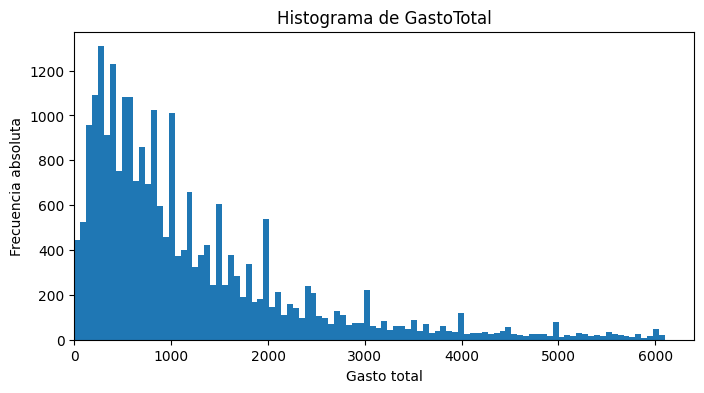

In [ ]:
percentil_96 = np.percentile(df.GastoTotal2, 96) # por recomendación de tutora fuimos hasta percentil 96 ya que los datos estaban muy atomizados y distorsionaban la visualización sin aportar mayor info descriptiva.
percentil_96
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df[df['GastoTotal2']<= percentil_96]['GastoTotal2'], bins=100)
ax.set_title('Histograma de GastoTotal')
ax.set_xlabel('Gasto total')
ax.set_ylabel('Frecuencia absoluta')
ax.set_xlim(left=0)


Agrego Histograma de dimsnsión "gente", entendida como grupo/núcleo que viaja (familia, pareja, amigos, etc). Aquí la distribución debería asemejarse a una "Normal" (moda, media y mediana se aproximan mucho) y vemos que el viajero UY promedio lo hace en pareja. Sin embargo, el gráfico nos muestra que no es así y que sigue habiendo asimetría positiva; "cola a la derecha".


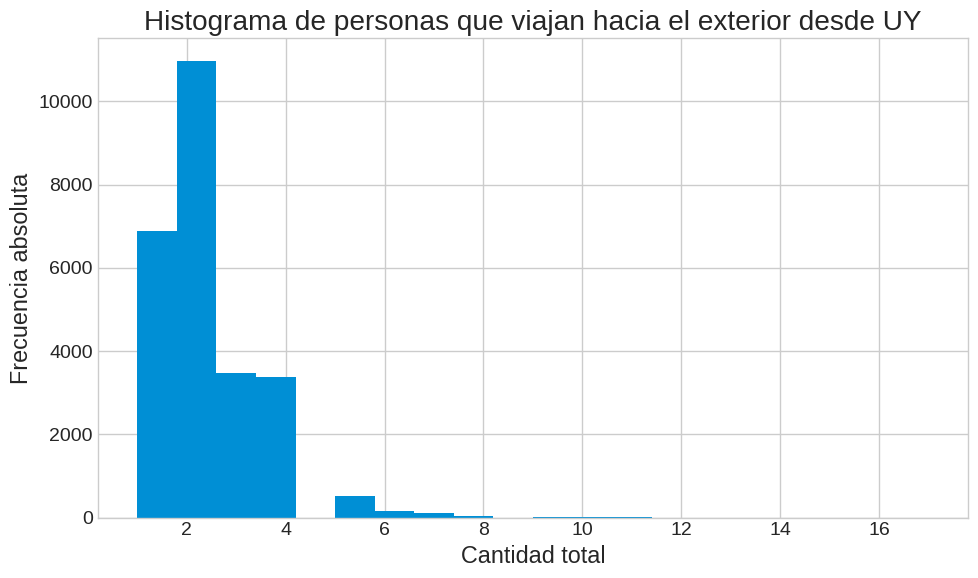

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Gente'], bins=20)
ax.set_title('Histograma de personas que viajan hacia el exterior desde UY')
ax.set_xlabel('Cantidad total')
ax.set_ylabel('Frecuencia absoluta')

fig.tight_layout()


In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df[df['GastoTotal2']<= percentil_96]['GastoTotal2'], bins=100)
ax.set_title('Histograma de GastoTotal')
ax.set_xlabel('Gasto total')
ax.set_ylabel('Frecuencia absoluta')
ax.set_xlim(left=0)

BAR CHART:

La idea era visuallizar el total de gasto por país de destino.
Argentina como proncipal era evidente y que le seguía Brasil también. Sin embargo, me sorprendió que se haya viajado más a Europa que a Centroamérica y América del Norte (EE.UU, principalmente).
también me interesaba abrirlo por año y confirmar la calamitosa subida a Argentina post-pandemia por temas cambiarios (año 2022 y sobre todo 2023, UY alcanza déficit en la balanza comercial, como nunca antes había tenido, explicado principalmente por la "importación" de turismo argentino). Para ello, fue que pivotee el DF, para básicamente llevarlo a algo parecido a una pivot table de MS Excel.
2023 crece mas de 10 millones respecto a 2022. Tenemos que retrotraernos a 2017 para ver algo similar.  Y en 2017 el aumento fue generalizado para todos los países, no algo puntual con Argentina.

<Figure size 1000x600 with 0 Axes>

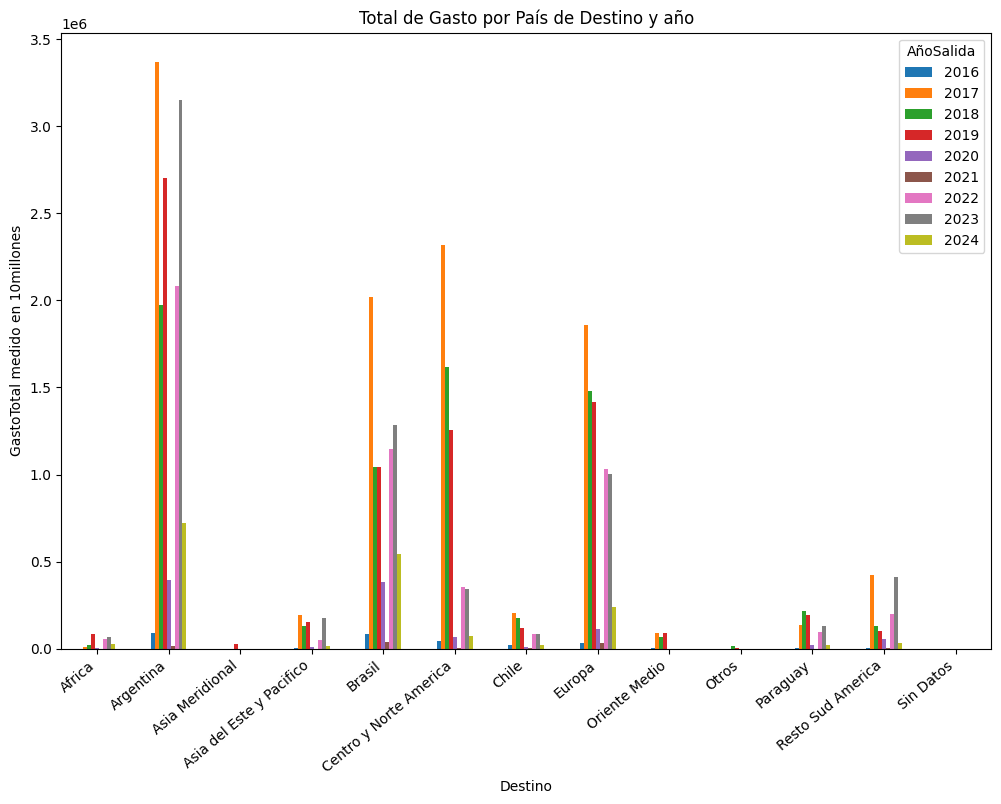

In [ ]:
df_grouped2 = df.groupby(['AñoSalida', 'Destino'])['GastoTotal2'].sum().reset_index()
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
df_pivot = df_grouped2.pivot(index='Destino', columns='AñoSalida', values='GastoTotal2')
ax = df_pivot.plot(kind='bar', figsize=(12, 8))  # Tipo de gráfico: barras
plt.title('Total de Gasto por País de Destino y año')  # Título del gráfico
plt.xlabel('Destino')  # Etiqueta del eje x
plt.ylabel('GastoTotal medido en 10millones')  # Etiqueta del eje y
plt.xticks(rotation=40, ha='right')  # Rotación de las etiquetas del eje x para mejor visualización
plt.show()

BAR CHART2:

Pero en este caso haciendo el gato promedio por turista donde aquí evidentemente los resultados se modifican notoriamente. Existe un par de outlier en Asia Meridional que entre ambos totalizan unos USD 40.000 que no se visualizan en el corte anterior. Lejos del promedio de Argentina de unos 1000 (que naturalmente se aproxima a la MODA) que en este corte queda en el penúltimo lugar.

<ipython-input-25-58f3106533b0>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(resumen_gasto_prom.index, rotation=45, ha='right')


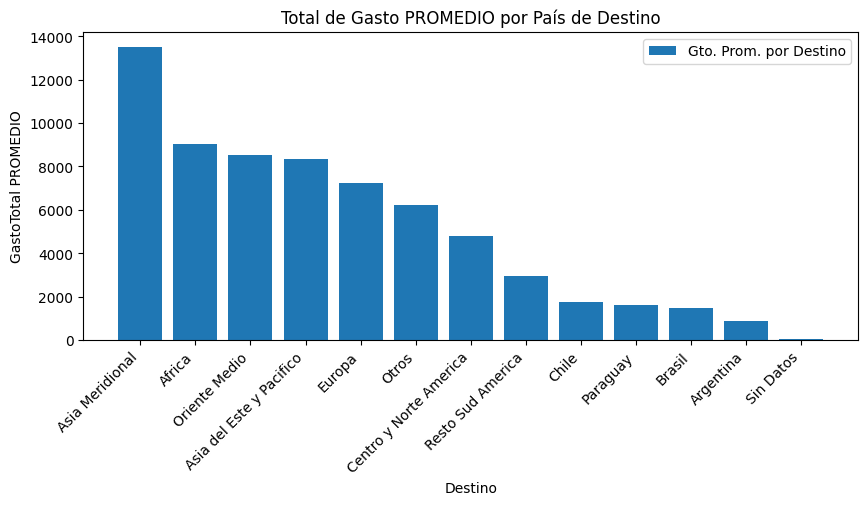

In [ ]:
fig, ax=plt.subplots(figsize=(10,4))
ax.bar(resumen_gasto_prom.index,resumen_gasto_prom.values)
ax.set_title('Total de Gasto PROMEDIO por País de Destino')
ax.set_xlabel('Destino')
ax.set_ylabel('GastoTotal PROMEDIO')
ax.legend(['Gto. Prom. por Destino'], loc='upper right',bbox_to_anchor=(1, 1))
ax.set_xticklabels(resumen_gasto_prom.index, rotation=45, ha='right')
plt.show()

PLOT (O DE LÍNEAS):
Grafiqué total de salidas por años a efectos de evidenciar el cierre de fronteras por Pandemia de COVID-2019 (año 2021)

In [ ]:
df['FechaSalida'] = pd.to_datetime(df['FechaSalida'])
df['AñoSalida'] = df['FechaSalida'].dt.year

In [ ]:
df_grouped = df.groupby(pd.Grouper(key='AñoSalida')).size().sort_index()
df_grouped


AñoSalida
2016     132
2017    6980
2018    3937
2019    4463
2020     783
2021      42
2022    3345
2023    4790
2024    1095
dtype: int64

**2021: pandemia, fronteras cerradas!!**




In [ ]:
df_grouped1=df.groupby(pd.Grouper(key='AñoSalida'))['GastoTotal2'].sum().sort_index()
df_grouped1

AñoSalida
2016      288109.27
2017    10627939.44
2018     6869576.19
2019     7195002.27
2020     1056143.35
2021       94641.94
2022     5107188.21
2023     6659846.13
2024     1697059.99
Name: GastoTotal2, dtype: float64

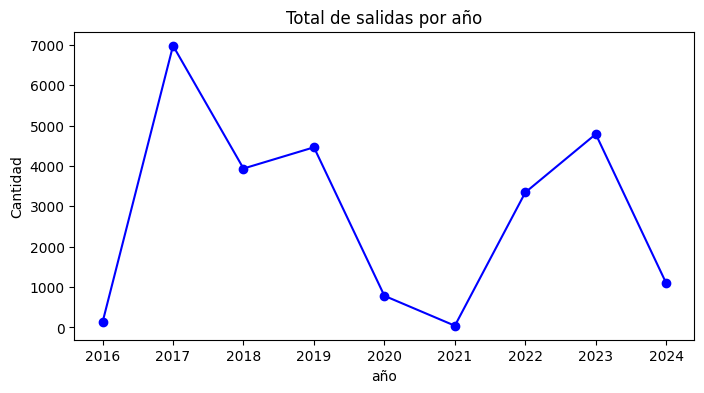

In [ ]:
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(df_grouped.index,df_grouped.values, marker='o', linestyle='-', color='b')
ax.set_title('Total de salidas por año')
ax.set_xlabel('año')
ax.set_ylabel('Cantidad')
plt.show()

Año 2024: solo tiene 5 meses por eso parece que cae, pero es muy probable por como viene que termine un poco por debajo de 2023 pero por encima de 2022.

BOXPLOT:
Otro gráfico univariado (puede ser utilizado para comprar variables entre sí, también, y no solo describirla). En este caso represento  el diagrama de caja para el gasto total medido en USD corrientes.
ALlí evidentemente se desmarcan los outlieres, de USD 3500 en adelante.
Luego también observamos que el 50% del universo poblacional (cuartil primero al tercero) se mueve en el entorno de los 500 y 1500. También observamos que la mediana está un poco por debajo de la moda, reflejando la asimietrìa positiva mencionada, y que la mediana (percentil 50) queda por debajo de la media.

Text(0, 0.5, 'Frecuencia absoluta')

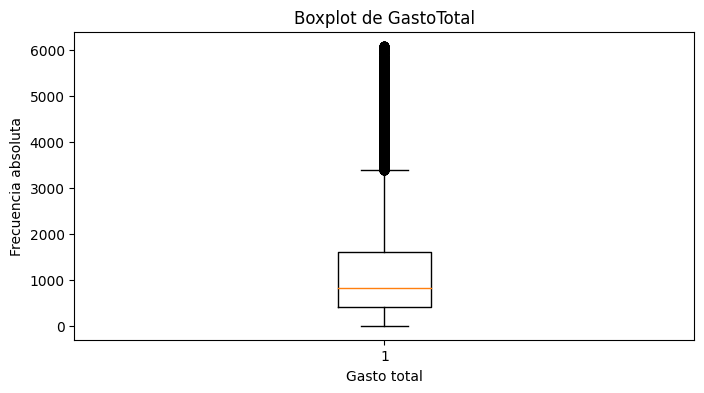

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(df[df['GastoTotal2']<= percentil_96]['GastoTotal2'])
ax.set_title('Boxplot de GastoTotal')
ax.set_xlabel('Gasto total')
ax.set_ylabel('Frecuencia absoluta')

In [ ]:
maximo = df['GastoTotal2'].max()
print(maximo)
minimo = df['GastoTotal2'].min()
print(minimo)

80000.0
0.0


PIE (O "DE TORTA")

Finalmente, el último univariado que me interesó repesentar es la distribución al interior de la categroría "motivos". Es decir, cantidad de turistas por caregoría. Aquí no contemplamos valores, sino que simplemente cantidad de turistas. En concordancia con la tutora, agrupamos categorías ya que el pastel quedaba muy atomisado y era poco legible.
Se refleja lo que esperábamos, casi la mitad de los viajes son por disfrute no siendo una necesidad básica. Por lo tanto, si se gasta mas en viajar es porque se puede. No es algo de primera necesidad.

In [ ]:
resumen_motivos = df['Motivo'].value_counts()
resumen_motivos_df = pd.DataFrame({'indice':resumen_motivos.index,'valor':resumen_motivos.values})
nueva_categoria_otros = resumen_motivos_df['valor'] < 500
resumen_motivos_df.loc[nueva_categoria_otros, 'indice'] = 'Otros'
resumen_motivos_df = resumen_motivos_df.groupby('indice', as_index=False)['valor'].sum()
resumen_motivos_df = resumen_motivos_df.sort_values(by='valor', ascending=False)
print(resumen_motivos_df)

                       indice  valor
1    Ocio, Recreo, Vacaciones  12466
4  Visita familiares / amigos   8371
3         Trabajo / Profesion   2874
2                       Otros    942
0                     Compras    914


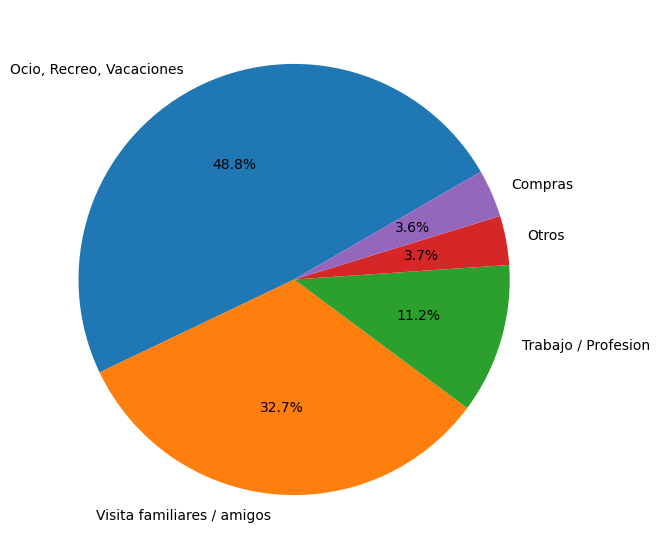

In [ ]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(resumen_motivos_df.valor, labels=resumen_motivos_df.indice,autopct = '%1.1f%%', startangle=30)
plt.show()

También lo hicimos por departamento (distrib al interior de UY de la residencia de los turistas) y también se reflejó lo esperado: Montevideo, capital, representa mas del 40% (casi un 50% de la población de UY se concentra en su capital) y se le anexamos Canelones (segundo en densidad poblacional), reunimos el 55.5% del total de los viajes. Nada fuera de lo esperado.

In [ ]:
resumen_depto_residencia = df['Departamento'].value_counts()
resumen_depto_residencia

Departamento
Montevideo        11085
Canelones          3084
Salto              1696
Paysandu           1428
Saqn Jose          1053
Rio Negro          1017
Maldonado           905
Colonia             870
Tacuarembo          769
Soriano             765
Artigas             678
Rivera              480
Cerro Largo         305
Durazno             262
Flores              256
Florida             247
Lavalleja           246
Treinta y Tres      215
Rocha               205
Sin Datos             1
Name: count, dtype: int64

In [ ]:
df_gasto_por_departamento = df.groupby('Departamento')['GastoTotal2'].sum().sort_values(ascending=False)
df_gasto_por_departamento

Departamento
Montevideo        20236731.18
Canelones          5221869.77
Maldonado          2115410.43
Salto              1650694.21
Saqn Jose          1534683.52
Paysandu           1129508.16
Tacuarembo         1018146.11
Colonia             961308.28
Soriano             960070.57
Rio Negro           954366.89
Florida             616694.78
Artigas             610342.14
Lavalleja           467657.89
Rivera              431984.67
Durazno             382019.64
Flores              360109.20
Treinta y Tres      359342.35
Cerro Largo         349532.97
Rocha               234034.03
Sin Datos             1000.00
Name: GastoTotal2, dtype: float64

gasto por depto salida (sería una apertura del gasto al exterior) de UY por zona geográfica.

In [ ]:
resumen_depto_residencia = df['Departamento'].value_counts()
resumen_depto_residencia_df = pd.DataFrame({'indice':resumen_depto_residencia.index,'valor':resumen_depto_residencia.values})
nueva_categoria_otros1 = (resumen_depto_residencia_df['valor'] < 1000) & (resumen_depto_residencia_df['valor'] >=500)
resumen_depto_residencia_df.loc[nueva_categoria_otros1, 'indice'] = 'Entre 1000 y 500: Maldonado, Colonia, Tacuarembó, Soriano y Artigas'
nueva_categoria_otros2 = resumen_depto_residencia_df['valor'] < 500
resumen_depto_residencia_df.loc[nueva_categoria_otros2, 'indice'] = 'Menos 500: Rivera, Cerrol Largo, Durazno, Flores, Florida, Lavalleja, Treinta y Tres, Rocha'
resumen_depto_residencia_df = resumen_depto_residencia_df.groupby('indice', as_index=False)['valor'].sum()
resumen_depto_residencia_df = resumen_depto_residencia_df.sort_values(by='valor', ascending=False)
print(resumen_depto_residencia_df)

                                              indice  valor
3                                         Montevideo  11085
1  Entre 1000 y 500: Maldonado, Colonia, Tacuarem...   3987
0                                          Canelones   3084
2  Menos 500: Rivera, Cerrol Largo, Durazno, Flor...   2217
6                                              Salto   1696
4                                           Paysandu   1428
7                                          Saqn Jose   1053
5                                          Rio Negro   1017


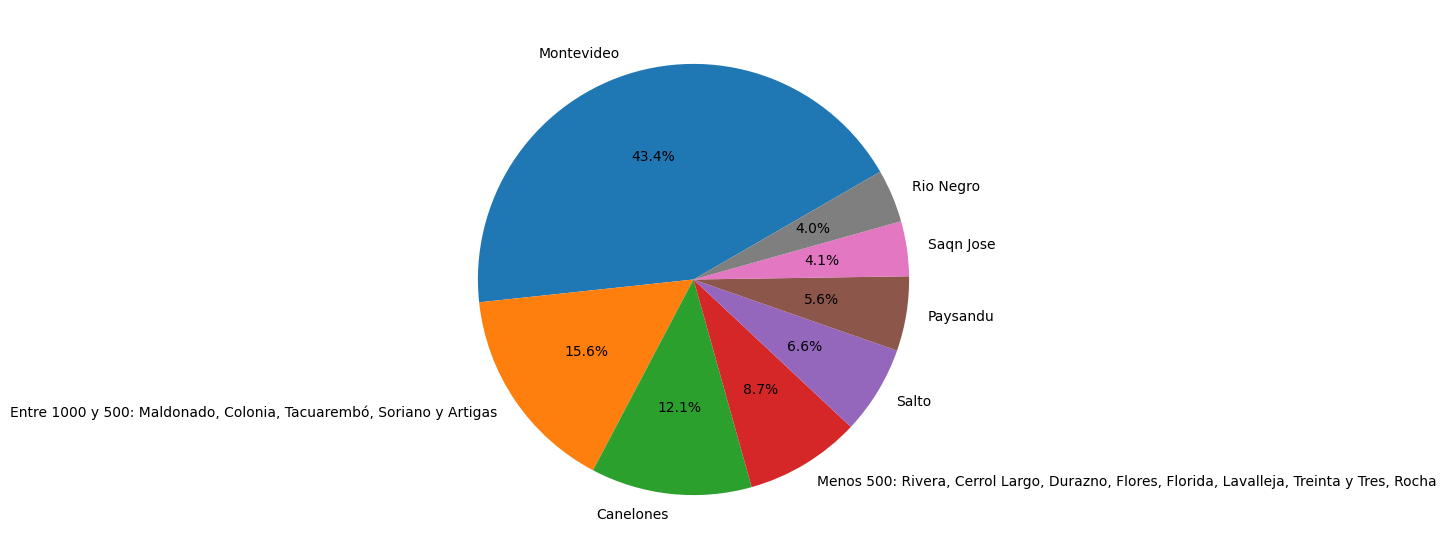

In [ ]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(resumen_depto_residencia_df.valor, labels=resumen_depto_residencia_df.indice,autopct = '%1.1f%%', startangle=30)
plt.show()

Visualizaciones BIVARIADAS:

Aquí si, intentaremos buscar correlaciones entre variables. Siendo su pincipal vehículo de representación, el scatter plot.

SCATTER (O DE DISPERSIÓN):

En este caso, intentaré encontrar alguna relación entre el gasto total y gasto alojamiento y gasto de transporte internacional, categorizado por "nivel de estudio" del turista.


<ipython-input-150-b2950b3185a5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


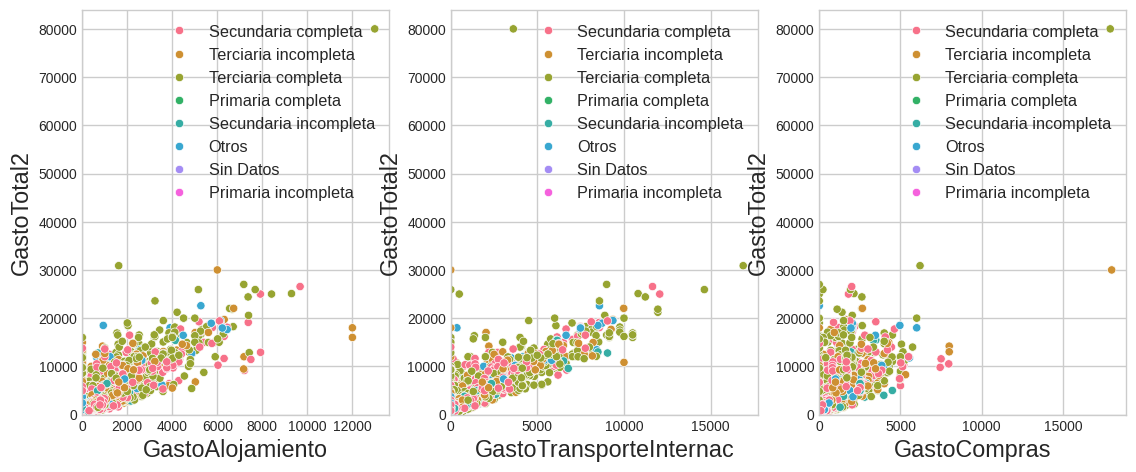

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(1,3, figsize=(12,5))
sns.scatterplot(data=df, x='GastoAlojamiento', y='GastoTotal2',hue='Estudio', ax=axs[0])
axs[0].legend(loc='upper right', fontsize='small')
ax[0]
sns.scatterplot(data=df, x='GastoTransporteInternac', y='GastoTotal2', hue='Estudio',ax=axs[1])
axs[1].legend(loc='upper right', fontsize='small')
sns.scatterplot(data=df, x='GastoCompras', y='GastoTotal2', hue='Estudio',ax=axs[2])
axs[2].legend(loc='upper right', fontsize='small')
for ax in axs: # utilizo el bucle for para iterar en cada uno de los graficos
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)
for ax in axs:  # ídem pero a nivel de etiquetas de datos
    ax.tick_params(axis='both', which='major', labelsize=10)




In [ ]:
correlation = df['GastoTotal2'].corr(df['GastoTransporteInternac'])
correlation

0.8455948099103711

In [ ]:
correlation2 = df['GastoTotal2'].corr(df['GastoAlojamiento'])
correlation2

0.8074738174935211

In [ ]:
correlation3 = df['GastoTotal2'].corr(df['GastoCompras'])
correlation3

0.689671398928366

Evidentmente la correlacion es positiva. A mayor gasto, mayor gasto de TranspInternacional y mayor gasto de Alojamiento. Sin embargo, es un poco mas fuerte la primera. Cuando agregamos el tercer plot de gasto por compras, se reduce bastante esa correlación. Es la menos positiva de las tres y por bastante. En cuanto a la educación parecería no influir mucho, o al menos a golpe de vista del gráfico. Lo único que sí podemos decir es que el que gastó más, o el ppl otulier, tiene nivel terciario completo.
Veremos qué sucede si seguimos ploteando por ocupación y estudio.

<ipython-input-149-700137080fdd>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


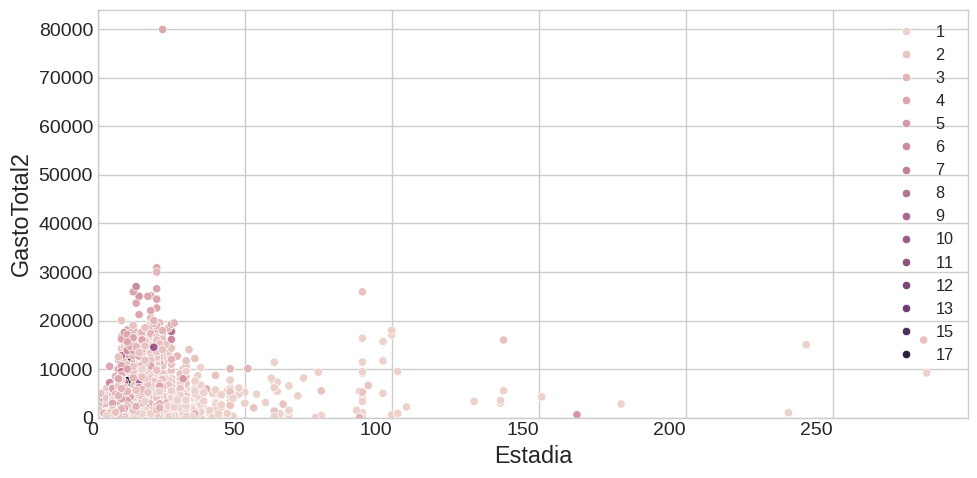

In [ ]:
import matplotlib.pyplot as plt
df['mes_año'] = df['FechaSalida'].dt.strftime('%m_%Y')
fig, axs = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=df, x='Estadia', y='GastoTotal2', hue='Gente',ax=axs, legend='full')
plt.xticks(rotation=0, ha='right')
axs.legend(loc='upper right', fontsize='small')
x_min, x_max = axs.get_xlim()
y_min, y_max = axs.get_ylim()
axs.set_xlim(0, x_max)
axs.set_ylim(0, y_max)
plt.style.use('seaborn-whitegrid')
fig.subplots_adjust()
fig.tight_layout()
plt.show()

<ipython-input-144-66b61027eeda>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-144-66b61027eeda>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-144-66b61027eeda>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-144-66b61027eeda>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-144-66b61027eeda>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer corr

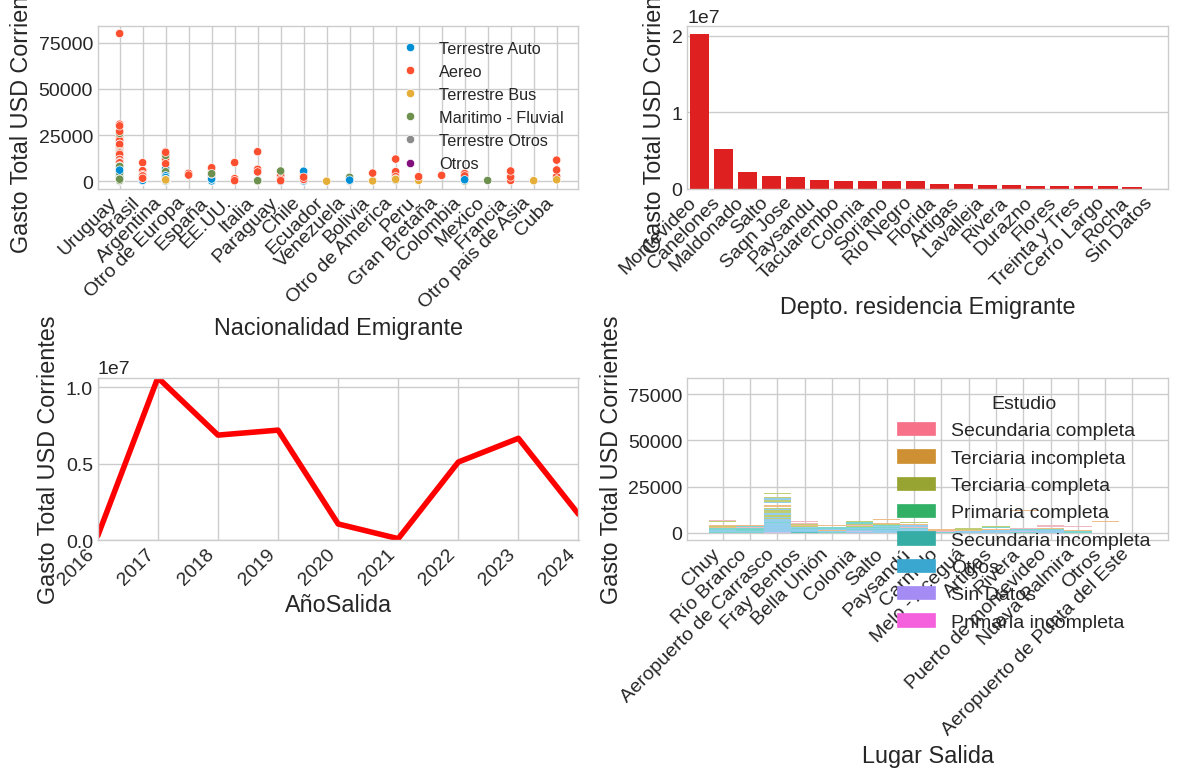

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot (data=df, x='Pais', y='GastoTotal2',hue='Transporte Internacional de Salida',ax=axs[0, 0])
axs[0, 0].set_xlabel('Nacionalidad Emigrante')
axs[0, 0].set_ylabel('Gasto Total USD Corrientes')
sns.barplot(x=df_gasto_por_departamento.index, y=df_gasto_por_departamento.values, color='red',ax=axs[0,1])
axs[0, 1].set_xlabel('Depto. residencia Emigrante')
axs[0, 1].set_ylabel('Gasto Total USD Corrientes')
sns.lineplot(x=df_grouped1.index,y=df_grouped1.values,color='red', ax=axs[1,0])
axs[1, 0].set_ylabel('Gasto Total USD Corrientes')
sns.histplot(data=df, x='Lugar Salida', y='GastoTotal2', hue='Estudio', ax=axs[1,1])
axs[1, 1].set_ylabel('Gasto Total USD Corrientes')
axs[1, 0].set_xlim(df_grouped1.index.min(), df_grouped1.index.max())
axs[1, 0].set_ylim(0, df_grouped1.values.max())
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
axs[0,0].legend(loc='upper right', fontsize='small')

fig.tight_layout()
plt.tight_layout()

